# Лабораторные работы по дисциплине "Методы, средства и технологии мультимедиа"

**Выполнила студентка гр. М8О-406Б-21 Волошинская Евгения Владимировна**

В качестве данных я выбрала датасет Loan Approval Classification Dataset (https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data). Эти данные могут быть использованы для обучения моделей ИИ, которые автоматизируют процесс одобрения кредитов, оценивают кредитный риск, выявляют важные факторы при принятии решений, обнаруживают потенциальное мошенничество и персонализируют кредитные предложения. Это помогает финансовым учреждениям повысить эффективность, уменьшить ручную работу, принимать более обоснованные решения при обработке кредитных заявок и улучшать клиентский опыт.

Данные подходят как для задачи классификации, так и для регрессии.

Для задачи классификации (предсказание одобрения займа): т.к. классы не сбалансированы, то основные метрики качества для сравнения моделей - Precision, Recall, F1-мера, но также рассчитаны и точность, и матрица ошибок, полнота и AUC.

Для задачи регрессии (расчет процентной ставки по займу):
MSE, MAE, MAPE и R2

## Лабораторная работа №3: Проведение исследований с решающим деревом

Импортируем необходимые библиотеки:

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Так как деревья лучше работают с категориальными данными, то возможно в качестве улучшения baseline применима дискретизация некоторых значений.

###Классификация

####Baseline

In [25]:
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

Accuracy : 89.91851851851852
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10493
           1       0.77      0.78      0.77      3007

    accuracy                           0.90     13500
   macro avg       0.85      0.86      0.85     13500
weighted avg       0.90      0.90      0.90     13500



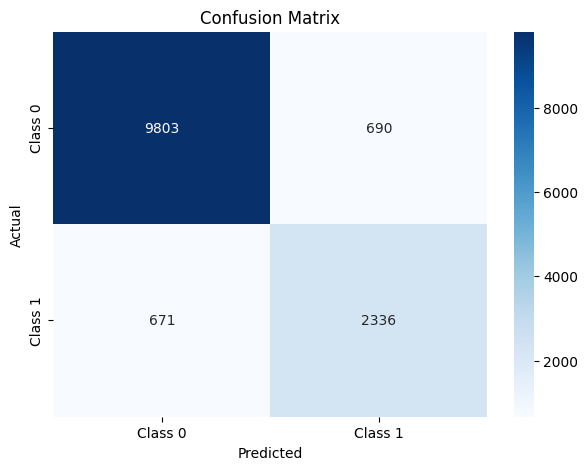

In [27]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

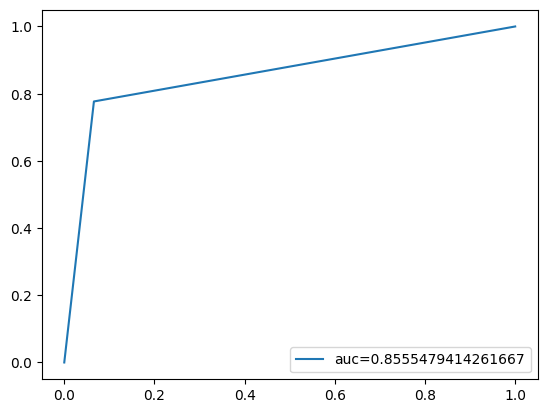

In [28]:
# ROC curve
y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

####Улучшенный бейзлайн:

Гипотеза 1. Нормализация данных улучшает точность модели

In [54]:
# one-hot encoding
df = pd.read_csv("loan_data.csv")
df = pd.get_dummies(df, drop_first=True)
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

In [55]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [57]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

Accuracy : 90.0
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10493
           1       0.77      0.78      0.78      3007

    accuracy                           0.90     13500
   macro avg       0.85      0.86      0.86     13500
weighted avg       0.90      0.90      0.90     13500



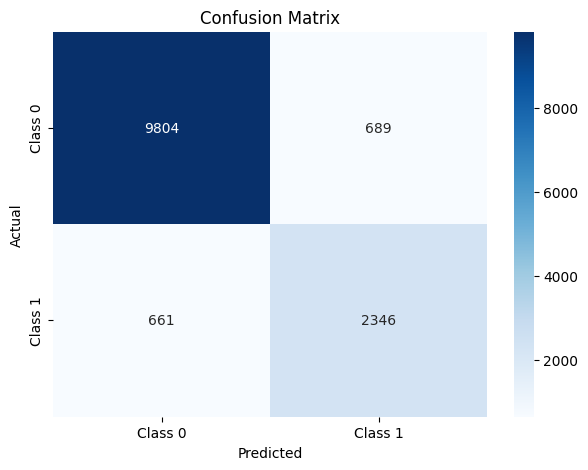

In [58]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Гипотеза 2. Подбор гиперпараметров

Ограничим глубину дерева, чтобы избежать переобучения, значения для min_samples_split и min_samples_leaf увеличены, чтобы предотвратить излишнюю тонкость в разбиении данных на более мелкие группы, используется параметр class_weight='balanced' для автоматической корректировки веса классов, что поможет для наших сильно несбалансированных данных.

In [60]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

param_grid = {
    'max_depth': np.arange(1, 15),
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}
tree_best = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

tree_best.fit(X_train, y_train)

print(tree_best.best_estimator_.get_params())

y_pred = tree_best.predict(X_test)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 11, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


Accuracy : 91.8962962962963
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10493
           1       0.87      0.75      0.81      3007

    accuracy                           0.92     13500
   macro avg       0.90      0.86      0.88     13500
weighted avg       0.92      0.92      0.92     13500



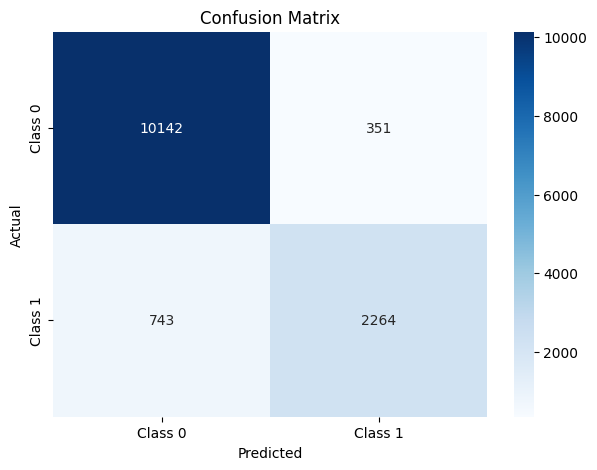

In [61]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

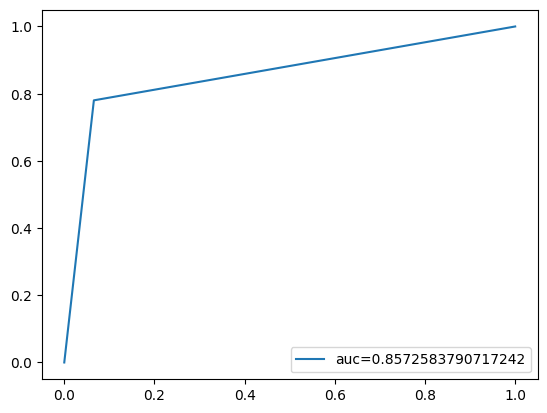

In [62]:
# ROC curve
y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

####Вывод:

Улучшенный бейзлайн дал значительное улучшение точности для задачи классификации, но пришлось прибегнуть к очень тонкой настройке гиперпараметров.

###Регрессия

####Baseline

In [63]:
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# обучение модели регрессии
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

Оценим качество модели по метрикам для регрессии:

In [68]:
features = X_test
y_pred = dt_regressor.predict(features)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.34793719802113
Mean Absolute Error: 2.2015143633228935
Mean Absolute Percentage Error (%): 0.22495313587612004
R² Score: 0.16402963534081894


Модель точна, если MAE и MSE близки к нулю, а r2 - к единице. В нашем случае это не совсем так, но могло быть и хуже.

####Улучшенный baseline

Нормализуем данные (гипотеза 1), настроим гиперпараметры модели с помощью GridSearchCV (гипотеза 2).

In [69]:
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [72]:
dt_regressor = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10, 8, 9],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 5, 10, 15, 20, 16, 17, 18]
}

grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Best parameters from GridSearchCV: {grid_search.best_params_}')
print(f'Best cross-validation score (MSE): {-grid_search.best_score_}')

best_dt_regressor = grid_search.best_estimator_
best_dt_regressor.fit(X_train, y_train)

y_pred = best_dt_regressor.predict(X_test)

Best parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score (MSE): 7.432339151497537


Оценим качество модели по метрикам для регрессии:

In [74]:
features = X_test
y_pred = best_dt_regressor.predict(features)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.33715085895169
Mean Absolute Error: 2.200053369188359
Mean Absolute Percentage Error (%): 0.22483103160571374
R² Score: 0.16525679060388332


Посмотрим интерпретацию дерева: какие переменные больше всего влияют на результат

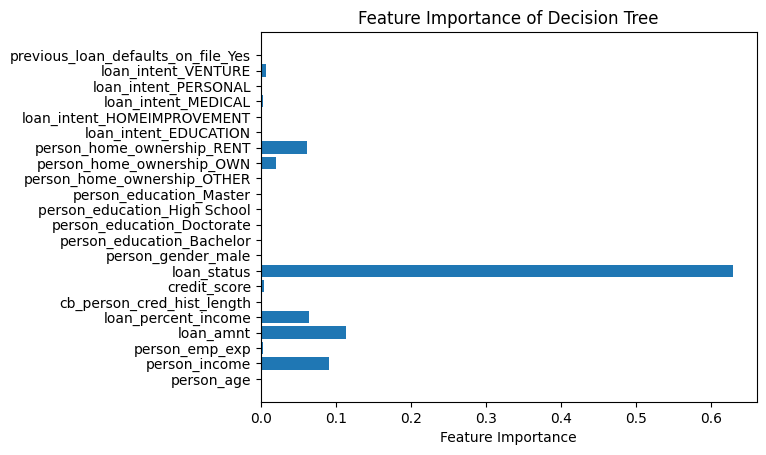

In [78]:
mse_scores = cross_val_score(best_dt_regressor, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

feature_importances = best_dt_regressor.feature_importances_
plt.barh(X_scaled.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Decision Tree')
plt.show()


####Вывод
Улучшение baseline регрессии дало небольшое увеличение точности.

###Самостоятельная имплементация моделей

####Классификация

#####baseline

In [82]:
from typing import Dict, Tuple, Union, Optional
import numpy as np
import pandas as pd
from numpy.typing import NDArray

class DecisionTree:
    def __init__(self, max_depth: Optional[int] = None) -> None:
        """
        Инициализация дерева решений.

        Args:
            max_depth: Максимальная глубина дерева. None для неограниченной глубины.
        """
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X: Union[NDArray, pd.DataFrame], y: Union[NDArray, pd.Series]) -> None:
        """
        Обучение дерева решений.

        Args:
            X: Матрица признаков (numpy array или pandas DataFrame)
            y: Вектор целевых значений (numpy array или pandas Series)
        """
        # Преобразование входных данных в numpy array, если они в pandas формате
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()

        self.tree = self._build_tree(X, y)

    def predict(self, X: Union[NDArray, pd.DataFrame]) -> NDArray:
        """
        Предсказание классов для новых данных.

        Args:
            X: Матрица признаков (numpy array или pandas DataFrame)

        Returns:
            NDArray: Вектор предсказанных меток классов
        """
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()

        return np.array([self._predict_single(x, self.tree) for x in X])


    def _build_tree(self, X: NDArray, y: NDArray, depth: int = 0) -> Union[Dict, int]:
        """
        Рекурсивное построение дерева решений.

        Args:
            X: Матрица признаков
            y: Вектор целевых значений
            depth: Текущая глубина в дереве

        Returns:
            Union[Dict, int]: Узел дерева или метка класса
        """
        # Базовые случаи остановки
        if len(set(y)) == 1:
            return y[0]
        if self.max_depth is not None and depth == self.max_depth:
            return self._majority_class(y)

        # Поиск лучшего разбиения
        best_split = self._find_best_split(X, y)
        if best_split is None:
            return self._majority_class(y)

        # Рекурсивное построение поддеревьев
        left_X, left_y, right_X, right_y = self._perform_split(X, y, best_split)
        return {
            'split': best_split,
            'left': self._build_tree(left_X, left_y, depth + 1),
            'right': self._build_tree(right_X, right_y, depth + 1)
        }

    def _find_best_split(self, X: NDArray, y: NDArray) -> Optional[Tuple[int, float]]:
        """
        Поиск оптимального разбиения данных.

        Args:
            X: Матрица признаков
            y: Вектор целевых значений

        Returns:
            Optional[Tuple[int, float]]: (индекс признака, порог) или None
        """
        best_gini = float('inf')
        best_split = None

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                gini = self._calculate_gini(y[left_mask], y[right_mask])
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_idx, threshold)

        return best_split

    def _calculate_gini(self, left_y: NDArray, right_y: NDArray) -> float:
        """
        Вычисление индекса Джини для разбиения.

        Args:
            left_y: Целевые значения левой ветви
            right_y: Целевые значения правой ветви

        Returns:
            float: Взвешенный индекс Джини
        """
        def gini_impurity(y: NDArray) -> float:
            proportions = np.bincount(y) / len(y)
            return 1 - np.sum(proportions ** 2)

        n_left, n_right = len(left_y), len(right_y)
        n_total = n_left + n_right

        return (n_left / n_total) * gini_impurity(left_y) + \
               (n_right / n_total) * gini_impurity(right_y)

    def _perform_split(self, X: NDArray, y: NDArray,
                      split: Tuple[int, float]) -> Tuple[NDArray, NDArray, NDArray, NDArray]:
        """
        Разделение данных по выбранному признаку и порогу.

        Args:
            X: Матрица признаков
            y: Вектор целевых значений
            split: Кортеж (индекс признака, порог)

        Returns:
            Tuple[NDArray, NDArray, NDArray, NDArray]: Разделенные данные
        """
        feature_idx, threshold = split
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask

        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def _majority_class(self, y: NDArray) -> int:
        """
        Определение доминирующего класса.

        Args:
            y: Вектор целевых значений

        Returns:
            int: Метка преобладающего класса
        """
        return np.bincount(y).argmax()

    def _predict_single(self, x: NDArray, node: Union[Dict, int]) -> int:
        """
        Предсказание класса для одного объекта.

        Args:
            x: Вектор признаков
            node: Узел дерева или метка класса

        Returns:
            int: Предсказанная метка класса
        """
        if not isinstance(node, dict):
            return node

        feature_idx, threshold = node['split']
        if x[feature_idx] <= threshold:
            return self._predict_single(x, node['left'])
        return self._predict_single(x, node['right'])

In [83]:
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
tree = DecisionTree(max_depth=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

Accuracy : 91.11111111111111
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10493
           1       0.85      0.73      0.78      3007

    accuracy                           0.91     13500
   macro avg       0.89      0.85      0.86     13500
weighted avg       0.91      0.91      0.91     13500



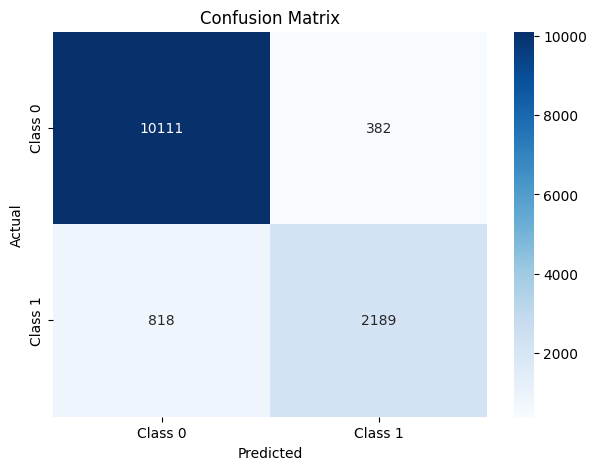

In [85]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#####Улучшенный baseline:

In [86]:
from typing import Dict, Tuple, Union, Optional
import numpy as np
import pandas as pd
from numpy.typing import NDArray

class DecisionTree:
    """
    Реализация дерева решений для задач классификации с поддержкой балансировки классов.

    Attributes:
        max_depth (Optional[int]): Максимальная глубина дерева
        min_samples_split (int): Минимальное количество образцов для разделения узла
        min_samples_leaf (int): Минимальное количество образцов в листовом узле
        class_weight (Optional[str]): Метод взвешивания классов ('balanced' или None)
    """

    def __init__(self,
                 max_depth: Optional[int] = None,
                 min_samples_split: int = 2,
                 min_samples_leaf: int = 1,
                 class_weight: Optional[str] = None) -> None:
        """
        Инициализация дерева решений.
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.class_weight = class_weight
        self.tree = None
        self.class_weights = None

    def fit(self, X: Union[NDArray, pd.DataFrame], y: Union[NDArray, pd.Series]) -> 'DecisionTree':
        """
        Обучение дерева решений.

        Args:
            X: Матрица признаков
            y: Вектор целевых значений

        Returns:
            self: Обученная модель
        """
        # Преобразование входных данных в numpy arrays
        X_array = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        y_array = y.to_numpy() if isinstance(y, pd.Series) else y

        if self.class_weight == 'balanced':
            self.class_weights = self._compute_class_weights(y_array)

        self.tree = self._build_tree(X_array, y_array)
        return self

    def _compute_class_weights(self, y: NDArray) -> Dict[int, float]:
        """
        Вычисление весов классов для балансировки.
        """
        class_counts = np.bincount(y)
        total_samples = len(y)
        weights = total_samples / (len(np.unique(y)) * class_counts)
        return dict(zip(np.unique(y), weights))

    def _build_tree(self, X: NDArray, y: NDArray, depth: int = 0) -> Union[Dict, int]:
        """
        Рекурсивное построение дерева решений.
        """
        # Проверка условий остановки
        if len(set(y)) == 1:
            return y[0]
        if self.max_depth is not None and depth == self.max_depth:
            return self._majority_class(y)
        if len(y) < self.min_samples_split:
            return self._majority_class(y)

        # Поиск лучшего разделения
        best_split = self._find_best_split(X, y)
        if best_split is None:
            return self._majority_class(y)

        # Построение поддеревьев
        left_X, left_y, right_X, right_y = self._perform_split(X, y, best_split)
        return {
            'split': best_split,
            'left': self._build_tree(left_X, left_y, depth + 1),
            'right': self._build_tree(right_X, right_y, depth + 1)
        }

    def _find_best_split(self, X: NDArray, y: NDArray) -> Optional[Tuple[int, float]]:
        """
        Поиск оптимального разделения данных.
        """
        best_gini = float('inf')
        best_split = None

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                left_y = y[left_mask]
                right_y = y[right_mask]

                if len(left_y) < self.min_samples_leaf or len(right_y) < self.min_samples_leaf:
                    continue

                gini = self._calculate_gini(left_y, right_y)
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_idx, threshold)

        return best_split

    def _calculate_gini(self, left_y: NDArray, right_y: NDArray) -> float:
        """
        Вычисление индекса Джини для разделения.
        """
        def gini_impurity(y: NDArray) -> float:
            proportions = np.bincount(y) / len(y)
            return 1 - np.sum(proportions ** 2)

        n_left, n_right = len(left_y), len(right_y)
        n_total = n_left + n_right

        left_gini = gini_impurity(left_y)
        right_gini = gini_impurity(right_y)

        return (n_left / n_total) * left_gini + (n_right / n_total) * right_gini

    def _perform_split(self, X: NDArray, y: NDArray,
                      split: Tuple[int, float]) -> Tuple[NDArray, NDArray, NDArray, NDArray]:
        """
        Разделение данных по выбранному признаку и порогу.
        """
        feature_idx, threshold = split
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask

        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def _majority_class(self, y: NDArray) -> int:
        """
        Определение доминирующего класса с учетом весов.
        """
        if self.class_weights is None:
            return np.bincount(y).argmax()

        weighted_counts = np.zeros(len(self.class_weights))
        for class_label, weight in self.class_weights.items():
            weighted_counts[class_label] = np.sum(y == class_label) * weight
        return weighted_counts.argmax()

    def predict(self, X: Union[NDArray, pd.DataFrame]) -> NDArray:
        """
        Предсказание классов для новых данных.
        """
        X_array = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        return np.array([self._predict_single(x, self.tree) for x in X_array])

    def _predict_single(self, x: NDArray, node: Union[Dict, int]) -> int:
        """
        Предсказание класса для одного объекта.
        """
        if not isinstance(node, dict):
            return node

        feature_idx, threshold = node['split']
        if x[feature_idx] <= threshold:
            return self._predict_single(x, node['left'])
        return self._predict_single(x, node['right'])

In [87]:
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
tree = DecisionTree(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced'
)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

Accuracy : 84.48148148148148
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     10493
           1       0.60      0.91      0.72      3007

    accuracy                           0.84     13500
   macro avg       0.78      0.87      0.81     13500
weighted avg       0.89      0.84      0.85     13500



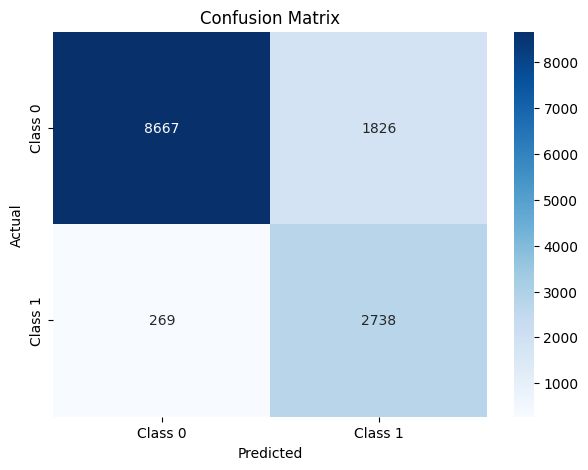

In [89]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

####Вывод:
К сожалению, улучшенный baseline в самостоятельной реализации показал худший результат. Baseline же был на уровне с baseline'ом реализации scikit-learn

####Регрессия

#####Baseline

In [95]:
from typing import Dict, Tuple, Union, Optional
import numpy as np
import pandas as pd
from numpy.typing import NDArray

class DecisionTreeRegressorCustom:
    """
    Пользовательская реализация дерева решений для задач регрессии.

    Attributes:
        max_depth (Optional[int]): Максимальная глубина дерева
        min_samples_split (int): Минимальное количество образцов для разделения узла
        min_samples_leaf (int): Минимальное количество образцов в листовом узле
        tree (Optional[Dict]): Структура дерева решений
    """

    def __init__(self,
                 max_depth: Optional[int] = None,
                 min_samples_split: int = 2,
                 min_samples_leaf: int = 1) -> None:
        """
        Инициализация регрессионного дерева решений.

        Args:
            max_depth: Максимальная глубина дерева
            min_samples_split: Минимальное количество образцов для разделения
            min_samples_leaf: Минимальное количество образцов в листе
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def fit(self, X: Union[NDArray, pd.DataFrame], y: Union[NDArray, pd.Series]) -> None:
        """
        Обучение дерева решений.

        Args:
            X: Матрица признаков
            y: Вектор целевых значений
        """
        # Преобразование входных данных в numpy arrays
        X_array = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        y_array = y.to_numpy() if isinstance(y, pd.Series) else y

        self.tree = self._build_tree(X_array, y_array)
        return self

    def predict(self, X: Union[NDArray, pd.DataFrame]) -> NDArray:
        """
        Предсказание значений для новых данных.

        Args:
            X: Матрица признаков для предсказания

        Returns:
            NDArray: Вектор предсказанных значений
        """
        X_array = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        return np.array([self._predict_single(x, self.tree) for x in X_array])

    def _build_tree(self, X: NDArray, y: NDArray, depth: int = 0) -> Union[Dict, float]:
        """
        Рекурсивное построение дерева решений.

        Args:
            X: Матрица признаков
            y: Вектор целевых значений
            depth: Текущая глубина в дереве

        Returns:
            Union[Dict, float]: Узел дерева или значение предсказания
        """
        n_samples, n_features = X.shape

        # Проверка условий остановки
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split:
            return np.mean(y)

        # Поиск лучшего разделения
        best_split = self._find_best_split(X, y, n_features)
        if best_split is None:
            return np.mean(y)

        # Построение поддеревьев
        left_tree = self._build_tree(*best_split['left'], depth + 1)
        right_tree = self._build_tree(*best_split['right'], depth + 1)

        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def _find_best_split(self, X: NDArray, y: NDArray, n_features: int) -> Optional[Dict]:
        """
        Поиск оптимального разделения данных.

        Args:
            X: Матрица признаков
            y: Вектор целевых значений
            n_features: Количество признаков

        Returns:
            Optional[Dict]: Информация о лучшем разделении или None
        """
        best_split = None
        min_mse = float('inf')

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                # Разделение данных
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]

                # Проверка условий для листьев
                if len(left_y) >= self.min_samples_leaf and \
                   len(right_y) >= self.min_samples_leaf:

                    mse = self._calculate_mse(left_y, right_y)
                    if mse < min_mse:
                        min_mse = mse
                        best_split = {
                            'feature': feature,
                            'threshold': threshold,
                            'left': (X[left_mask], left_y),
                            'right': (X[right_mask], right_y)
                        }

        return best_split

    def _calculate_mse(self, left_y: NDArray, right_y: NDArray) -> float:
        """
        Вычисление среднеквадратичной ошибки для разделения.

        Args:
            left_y: Целевые значения левой ветви
            right_y: Целевые значения правой ветви

        Returns:
            float: Взвешенная среднеквадратичная ошибка
        """
        left_mean = np.mean(left_y)
        right_mean = np.mean(right_y)

        left_mse = np.mean((left_y - left_mean) ** 2)
        right_mse = np.mean((right_y - right_mean) ** 2)

        n_left, n_right = len(left_y), len(right_y)
        weighted_mse = (n_left * left_mse + n_right * right_mse) / (n_left + n_right)

        return weighted_mse

    def _predict_single(self, x: NDArray, node: Union[Dict, float]) -> float:
        """
        Предсказание значения для одного объекта.

        Args:
            x: Вектор признаков
            node: Узел дерева или значение предсказания

        Returns:
            float: Предсказанное значение
        """
        if not isinstance(node, dict):
            return node

        if x[node['feature']] <= node['threshold']:
            return self._predict_single(x, node['left'])
        return self._predict_single(x, node['right'])

In [96]:
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
dt_regressor = DecisionTreeRegressorCustom(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

In [98]:
features = X_test
y_pred = dt_regressor.predict(features)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.3477876858947315
Mean Absolute Error: 2.201430655461688
Mean Absolute Percentage Error (%): 0.22494753063985343
R² Score: 0.16404664524488566


#####Улучшенный baseline:

In [99]:
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [102]:
dt_regressor = DecisionTreeRegressorCustom(max_depth=7, min_samples_split=2, min_samples_leaf=16)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

In [103]:
features = X_test
y_pred = dt_regressor.predict(features)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.365700968189253
Mean Absolute Error: 2.2005622687544673
Mean Absolute Percentage Error (%): 0.22465580868307078
R² Score: 0.1620086619676162


#####Вывод: Как baseline, так и улучшенный baseline в самостоятельной реализации в задаче регрессии показали результат, сравнимый с baseline библиотеки scikit-learn